In [1]:
import  xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import warnings

# Maximum Temperature

In [2]:
path='/mnt/1A42C1DD42C1BE2F/MyProjects/ML_HEATWAVE/Maximum Temperature//*.nc'

data_tmax=xr.open_mfdataset(path)

In [3]:
data_tmax

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, time: 15340, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2022-12-31
Dimensions without coordinates: nbnds
Data variables:
    tmax       (time, lat, lon) float32 dask.array<chunksize=(365, 94, 192), meta=np.ndarray>
    time_bnds  (time, nbnds) float64 dask.array<chunksize=(365, 2), meta=np.ndarray>
Attributes:
    Conventions:    COARDS
    title:          daily NMC reanalysis (1981)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 95/03/13 by Hoop (netCDF2.3)\nConverted to chunke...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

# Resizing grid size

In [40]:
new_lat = np.arange(90, -91, -02.5).astype(np.float32)
new_lon = np.arange(0, 360, 02.5).astype(np.float32)

# Resample to the new grid size
new_ds = data_tmax.interp(lat=new_lat, lon=new_lon)

In [41]:
new_ds

<xarray.Dataset>
Dimensions:    (time: 15340, lat: 73, lon: 144, nbnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2022-12-31
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: nbnds
Data variables:
    tmax       (time, lat, lon) float32 dask.array<chunksize=(365, 73, 144), meta=np.ndarray>
    time_bnds  (time, nbnds) float64 dask.array<chunksize=(365, 2), meta=np.ndarray>
Attributes:
    Conventions:    COARDS
    title:          daily NMC reanalysis (1981)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 95/03/13 by Hoop (netCDF2.3)\nConverted to chunke...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [42]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [43]:
lat_range = slice(29,18.0)  # take lat values in backwards directions.
lon_range = slice(85, 97)  # 88.0 degrees east to 92.7 degrees east
desired_time = '1991-05-15'
# 1991-05-15
# Use the sel method to select data within the specified Bangladesh region
# data_bangladesh_original = data.sel(lat=lat_range,lon=lon_range,time=desired_time)
data_bangladesh_resized = new_ds.sel(lat=lat_range,lon=lon_range,time=desired_time)



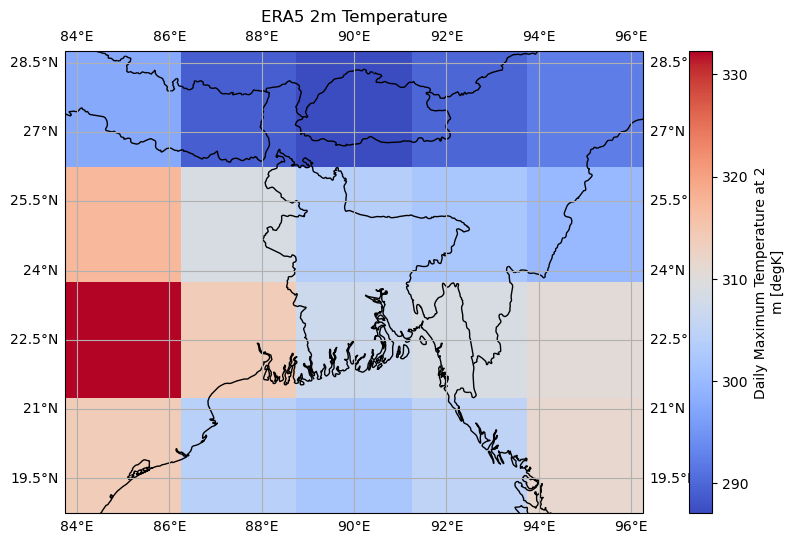

In [44]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define the projection (PlateCarree for lat/lon data)
projection = ccrs.PlateCarree()

# Create a figure and axis with Cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': projection},figsize=(12,6))

# Plot the temperature data
data_bangladesh_resized['tmax'].plot.pcolormesh(ax=ax, transform=projection,cmap='coolwarm')

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.BORDERS)
# ax.set_extent([80, 100, 15, 30])
# Customize plot properties
plt.title('ERA5 2m Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a colorbar

ax.set_label('Temperature (K)')

# Show the plot
plt.show()


# Extracting data

In [9]:
lat_range = slice(29,18.0)  # take lat values in backwards directions.
lon_range = slice(85, 97)  # 88.0 degrees east to 92.7 degrees east

# Use the sel method to select data within the specified Bangladesh region
tmax_bangladesh_resized = new_ds.sel(lat=lat_range,lon=lon_range)





In [10]:
import pandas as pd
import xarray as xr
from tqdm.auto import tqdm# Import tqdm
warnings.filterwarnings('ignore')

# # Open your netCDF dataset
# ds = xr.open_dataset('your_dataset.nc')

# Define the chunk size
chunk_size = 500  # Adjust this based on your available memory

# Initialize an empty DataFrame to store the results
tmax_df = pd.DataFrame(columns=['time', 'lat', 'lon', 'tmax'])

# Calculate the number of chunks
num_chunks = len(tmax_bangladesh_resized.time)

# Create a tqdm progress bar
for start in tqdm(range(0, num_chunks, chunk_size),desc='Main Loop'):
    end = start + chunk_size
    chunk = tmax_bangladesh_resized.isel(time=slice(start, end))

    # Extract the data
    time = chunk.time.values
    lat = chunk.lat.values
    lon = chunk.lon.values
    tmax = chunk.tmax.values

    # Create a DataFrame for this chunk and append it to the main DataFrame
    chunk_df = pd.DataFrame({
        'time': time.repeat(len(lat) * len(lon)),
        'lat': np.tile(lat, len(time) * len(lon)),
        'lon': np.tile(lon, len(time) * len(lat)),
        'tmax': tmax.ravel()
    })

    tmax_df = tmax_df.append(chunk_df, ignore_index=True)

# t2m_df now contains the concatenated data
tmax_df

Main Loop:   0%|          | 0/31 [00:00<?, ?it/s]

,time,lat,lon,tmax
0,1981-01-01,27.5,85.0,285.859283
1,1981-01-01,25.0,87.5,281.475647
2,1981-01-01,22.5,90.0,280.047211
3,1981-01-01,20.0,92.5,281.852112
4,1981-01-01,27.5,95.0,283.706787
...,...,...,...,...
306795,2022-12-31,20.0,85.0,301.033569
306796,2022-12-31,27.5,87.5,297.567322
306797,2022-12-31,25.0,90.0,295.600220
306798,2022-12-31,22.5,92.5,296.333496


In [27]:
tmax_df[75730:]

,time,lat,lon,tmax
75730,1991-05-15,22.5,85.0,332.280457
75731,1991-05-15,20.0,87.5,314.103333
75732,1991-05-15,27.5,90.0,306.931763
75733,1991-05-15,25.0,92.5,308.695648
75734,1991-05-15,22.5,95.0,310.561981
...,...,...,...,...
306795,2022-12-31,20.0,85.0,301.033569
306796,2022-12-31,27.5,87.5,297.567322
306797,2022-12-31,25.0,90.0,295.600220
306798,2022-12-31,22.5,92.5,296.333496


# Minimum Temperature


In [12]:
path='/mnt/1A42C1DD42C1BE2F/MyProjects/ML_HEATWAVE/Minimum Temperature///*.nc'

data_tmin=xr.open_mfdataset(path)

In [13]:
data_tmin.tmin

<xarray.DataArray 'tmin' (time: 15340, lat: 94, lon: 192)>
dask.array<concatenate, shape=(15340, 94, 192), dtype=float32, chunksize=(366, 94, 192), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2022-12-31
Attributes:
    long_name:     Daily Minimum Temperature at 2 m
    units:         degK
    precision:     2
    GRIB_id:       16
    GRIB_name:     T MIN
    var_desc:      Minimum Temperature
    dataset:       NCEP Reanalysis Daily Values
    level_desc:    2 m
    statistic:     Daily Minimum
    parent_stat:   Individual Obs
    actual_range:  [169.20001 309.2    ]
    valid_range:   [150. 400.]

# Resizing grid size

In [14]:
new_lat = np.arange(90, -91, -02.5).astype(np.float32)
new_lon = np.arange(0, 360, 02.5).astype(np.float32)

# Resample to the new grid size
new_ds = data_tmin.interp(lat=new_lat, lon=new_lon)

In [15]:
new_ds

<xarray.Dataset>
Dimensions:    (time: 15340, lat: 73, lon: 144, nbnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2022-12-31
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: nbnds
Data variables:
    tmin       (time, lat, lon) float32 dask.array<chunksize=(365, 73, 144), meta=np.ndarray>
    time_bnds  (time, nbnds) float64 dask.array<chunksize=(365, 2), meta=np.ndarray>
Attributes:
    Conventions:    COARDS
    title:          daily NMC reanalysis (1981)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 95/03/13 by Hoop (netCDF2.3)\nConverted to chunke...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

# Plotting

In [16]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [17]:
lat_range = slice(29,18.0)  # take lat values in backwards directions.
lon_range = slice(85, 97)  # 88.0 degrees east to 92.7 degrees east
desired_time = '2022-01-03T00:00:00.000000000'
# Use the sel method to select data within the specified Bangladesh region
# data_bangladesh_original = data.sel(lat=lat_range,lon=lon_range,time=desired_time)
data_bangladesh_resized = new_ds.sel(lat=lat_range,lon=lon_range,time=desired_time)





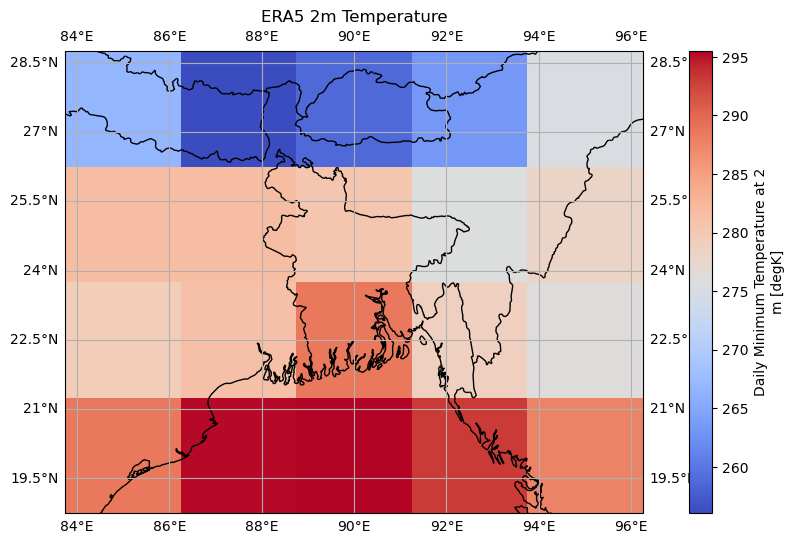

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define the projection (PlateCarree for lat/lon data)
projection = ccrs.PlateCarree()

# Create a figure and axis with Cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': projection},figsize=(12,6))

# Plot the temperature data
data_bangladesh_resized['tmin'].plot.pcolormesh(ax=ax, transform=projection,cmap='coolwarm')

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.BORDERS)
# ax.set_extent([80, 100, 15, 30])
# Customize plot properties
plt.title('ERA5 2m Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a colorbar

ax.set_label('Temperature (K)')

# Show the plot
plt.show()


# Extracting data

In [19]:
lat_range = slice(29,18.0)  # take lat values in backwards directions.
lon_range = slice(85, 97)  # 88.0 degrees east to 92.7 degrees east

# Use the sel method to select data within the specified Bangladesh region
tmin_bangladesh_resized = new_ds.sel(lat=lat_range,lon=lon_range)





In [20]:
import pandas as pd
import xarray as xr
from tqdm.auto import tqdm# Import tqdm
warnings.filterwarnings('ignore')

# # Open your netCDF dataset
# ds = xr.open_dataset('your_dataset.nc')

# Define the chunk size
chunk_size = 500  # Adjust this based on your available memory

# Initialize an empty DataFrame to store the results
tmin_df = pd.DataFrame(columns=['time', 'lat', 'lon', 'tmin'])

# Calculate the number of chunks
num_chunks = len(tmin_bangladesh_resized.time)

# Create a tqdm progress bar
for start in tqdm(range(0, num_chunks, chunk_size),desc='Main Loop'):
    end = start + chunk_size
    chunk = tmin_bangladesh_resized.isel(time=slice(start, end))

    # Extract the data
    time = chunk.time.values
    lat = chunk.lat.values
    lon = chunk.lon.values
    tmin = chunk.tmin.values

    # Create a DataFrame for this chunk and append it to the main DataFrame
    chunk_df = pd.DataFrame({
        'time': time.repeat(len(lat) * len(lon)),
        'lat': np.tile(lat, len(time) * len(lon)),
        'lon': np.tile(lon, len(time) * len(lat)),
        'tmin': tmin.ravel()
    })

    tmin_df = tmin_df.append(chunk_df, ignore_index=True)

# t2m_df now contains the concatenated data
tmin_df

Main Loop:   0%|          | 0/31 [00:00<?, ?it/s]

,time,lat,lon,tmin
0,1981-01-01,27.5,85.0,263.385925
1,1981-01-01,25.0,87.5,263.823303
2,1981-01-01,22.5,90.0,268.879089
3,1981-01-01,20.0,92.5,270.355469
4,1981-01-01,27.5,95.0,272.851929
...,...,...,...,...
306795,2022-12-31,20.0,85.0,287.864960
306796,2022-12-31,27.5,87.5,295.064178
306797,2022-12-31,25.0,90.0,294.099731
306798,2022-12-31,22.5,92.5,290.930939


In [21]:
sanjid

tmax_df
tmin_df

NameError: name 'sanjid' is not defined

In [ ]:
# lat_range = slice(29,18.0)  # take lat values in backwards directions.
# lon_range = slice(85, 97)  # 88.0 degrees east to 92.7 degrees east
# time_range = slice('1981-01-01', '2022-01-31')
# # Use the sel method to select data within the specified Bangladesh region
# tmin_bangladesh_resized = new_ds.sel(lat=lat_range,lon=lon_range,time=time_range)





# Etracting data for only AMJ

In [ ]:
import pandas as pd

# Define the range of years
lat_range = slice(29,18.0)  # take lat values in backwards directions.
lon_range = slice(85, 97)  # 88.0 degrees east to 92.7 degrees east
years = range(1981, 2023)

# Define the months
months = [4, 5, 6]

# Create an empty list to store the DataArrays
data_arrays = []

# Iterate over years and months
for year in years:
    # Define the time range for the specific year and month
    start_date = f'{year}-04-01'
    end_date = f'{year}-06-30'

    time_range = slice(start_date, end_date)

    # Use the sel method to select data within the specified time range
    selected_data = new_ds.sel(lat=lat_range, lon=lon_range, time=time_range)

    # Append the selected data to the list
    data_arrays.append(selected_data)

# Concatenate the DataArrays along the 'time' dimension
tmin_bangladesh_resized = xr.concat(data_arrays, dim='time')

In [ ]:
import pandas as pd
import xarray as xr
from tqdm.auto import tqdm# Import tqdm
warnings.filterwarnings('ignore')

# # Open your netCDF dataset
# ds = xr.open_dataset('your_dataset.nc')

# Define the chunk size
chunk_size = 500  # Adjust this based on your available memory

# Initialize an empty DataFrame to store the results
tmin_df = pd.DataFrame(columns=['time', 'lat', 'lon', 'tmin'])

# Calculate the number of chunks
num_chunks = len(tmin_bangladesh_resized.time)

# Create a tqdm progress bar
for start in tqdm(range(0, num_chunks, chunk_size),desc='Main Loop'):
    end = start + chunk_size
    chunk = tmin_bangladesh_resized.isel(time=slice(start, end))

    # Extract the data
    time = chunk.time.values
    lat = chunk.lat.values
    lon = chunk.lon.values
    tmin = chunk.tmin.values

    # Create a DataFrame for this chunk and append it to the main DataFrame
    chunk_df = pd.DataFrame({
        'time': time.repeat(len(lat) * len(lon)),
        'lat': np.tile(lat, len(time) * len(lon)),
        'lon': np.tile(lon, len(time) * len(lat)),
        'tmin': tmin.ravel()
    })

    tmin_df = tmin_df.append(chunk_df, ignore_index=True)

# t2m_df now contains the concatenated data
tmin_df

In [ ]:
tmin_df['tmin'].max()


In [ ]:
start_date

In [ ]:

# Python Program illustrating
# numpy.percentile() method
   
import numpy as np
   
# 1D array
arr = [ 2, 3, 1, 4,5]
print("arr : ", arr)
print("50th percentile of arr : ",
       np.percentile(arr, 50))
print("25th percentile of arr : ",
       np.percentile(arr, 25))
print("75th percentile of arr : ",
       np.percentile(arr, 75))